In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from scipy.stats import chi2_contingency

In [3]:
# Load the data from the CSV file

df = pd.read_csv('PBH_dataset.csv')

# Display the DataFrame to check if the header is correct
print("DataFrame with correct header:")
df.head()



DataFrame with correct header:


,What is your age group?,What is the size of your household?,How many children under 5 years live in your household?,What is the primary material used for constructing your home?,Do you live near mosquito breeding sites such as stagnant water or swamps?,Are you aware of Long-Lasting Insecticidal Nets (LLINs)?,Do you know about Indoor Residual Spraying (IRS) for malaria prevention?,How did you first learn about LLINs and IRS?,Do you understand how LLINs and IRS work to prevent malaria?,Do you know how often IRS should be conducted in your home?,...,How often should community awareness programs about LLINs and IRS be conducted?,Are there cultural or religious beliefs in your community that affect the acceptance of LLINs or IRS?,What improvements would you recommend for the distribution of LLINs in your community?,How can the effectiveness of IRS programs be improved in your area?,Do you think there is sufficient government support for malaria control in your area?,Have you or your community members been involved in malaria control planning?,What is the most significant challenge in using LLINs and IRS in your household?,Are you satisfied with the current efforts to control malaria in your community?,What additional recommendations do you have to make LLINs and IRS more effective in malaria control?,What additional recommendations to government for more effective in malaria control?
0,41-60 years,4-6 members,NaN,Cement,No,Yes,Yes,"Media (radio, TV, posters)",Yes,Yes,...,Annually,No,More frequent distribution,Better scheduling,No,Yes,Lack of access,Moderately satisfied,Regular distribution of nets,Regular distribution of nets
1,20-40 years,4-6 members,3 or more,Cement,Yes,Yes,No,Healthcare workers,Yes,No,...,Annually,No,Increased community involvement,Increased community awareness,No,Yes,Misuse of LLINs,Very satisfied,Sensitization programme,Sensitization programme
2,Above 60 years,More than 6 members,None,Cement,No,Yes,Yes,"Media (radio, TV, posters)",Yes,Yes,...,Annually,No,Improved quality of nets,Better scheduling,No,No,Lack of access,Not satisfied,Insecticides should be affordable,Insecticides should be affordable
3,41-60 years,4-6 members,NaN,Cement,No,Yes,No,"Media (radio, TV, posters)",No,No,...,Quarterly,No,More frequent distribution,Increased community awareness,Yes,Yes,Lack of access,Very satisfied,Efficient distribution of nets and insecticida...,Efficient distribution of nets and insecticida...
4,41-60 years,More than 6 members,One to two,Cement,No,Yes,Yes,Community meetings,Yes,No,...,Annually,Yes,More frequent distribution,Increased community awareness,Yes,Yes,Misuse of LLINs,Very satisfied,Regular distribution of nets,Regular distribution of nets


## OBJECTIVE 1
To determine LLIN and IRS coverage and utilization rates in rural communities using descriptive statistics.

In [4]:
# Rename the relevant columns to be more concise
df.rename(columns={
    'Has your home been sprayed for mosquito control in the past year?': 'IRS Coverage',
    'How often do you or your household members experience malaria symptoms?': 'Malaria_Incidence'
}, inplace=True)

### LLIN Coverage

In [5]:
print("LLIN Coverage:")
llin_coverage = df['Does your household currently have insecticidal nets?'].value_counts(normalize=True) * 100
print(llin_coverage)

LLIN Coverage:
Does your household currently have insecticidal nets?
Yes    73.504274
No     26.495726
Name: proportion, dtype: float64


### LLIN Utilization

In [6]:
print("\nLLIN Utilization:")
llin_utilization = df['How often do household members use LLINs while sleeping?'].value_counts(normalize=True) * 100
print(llin_utilization)


LLIN Utilization:
How often do household members use LLINs while sleeping?
Every night     36.752137
Occasionally    32.478632
Never           17.948718
Rarely          12.820513
Name: proportion, dtype: float64


### IRS Coverage

In [7]:
# Has your home been sprayed for mosquito control in the past year? was renamed as 'IRS Coverage' previously
print("IRS Coverage")
irs_coverage = df['IRS Coverage'].value_counts(normalize=True) * 100
print(irs_coverage)

IRS Coverage
IRS Coverage
No     52.991453
Yes    47.008547
Name: proportion, dtype: float64


### IRS Utilization

In [8]:
# Filter the DataFrame for only "Yes" responses to IRS coverage
irs_yes_df = df[df['IRS Coverage'] == 'Yes']

print("\nIRS Utilization (for those who had their homes sprayed):")
irs_utilization = irs_yes_df['If yes, how many times has IRS been conducted in your home?'].value_counts(normalize=True) * 100
print(irs_utilization)


IRS Utilization (for those who had their homes sprayed):
If yes, how many times has IRS been conducted in your home?
More than twice    58.181818
Twice              29.090909
Once               12.727273
Name: proportion, dtype: float64


## OBJECTIVE 2
To assess the difference in malaria incidence between households using LLIN/IRS and those not using them using chi-square tests.

### Contingency table for Long-Lasting Insecticidal Nets (LLINs)

In [10]:
# Create the contingency table
# I am looking at the relationship between LLINs and Malaria Incidence.
# Use the exact column names from the dataset.

contingency_table = pd.crosstab(
    df['Does your household currently have insecticidal nets?'],
    df['Malaria_Incidence']
)

# Print the table to see the observed counts
contingency_table

Malaria_Incidence,Frequently(3 or moe times a year),Occasionally(1-2 times a year),Rarely(less than once a year)
Does your household currently have insecticidal nets?,,,
No,6,15,10
Yes,19,32,35


### Chi-square test for LLINs

In [11]:
# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the key results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 1.21
P-value: 0.5459
Degrees of freedom: 2


In [12]:
# Set the significance level (alpha)
alpha = 0.05

print("Conclusion:")
if p_value < alpha:
    print("The p-value is less than 0.05.")
    print("This means the relationship between LLIN use and malaria incidence is statistically significant.")
    print("It suggests that LLINs are associated with lower malaria incidence.")
else:
    print("The p-value is greater than 0.05.")
    print("This means the relationship is not statistically significant. Any observed difference could be due to random chance.")

Conclusion:
The p-value is greater than 0.05.
This means the relationship is not statistically significant. Any observed difference could be due to random chance.


## Indoor Residual Spraying (IRS) analysis 

### Contingency table for Indoor Residual Spraying (IRS)

In [13]:
# Create the contingency table
# I am looking at the relationship between IRS Coverage and Malaria Incidence.
contingency_table = pd.crosstab(
    df['IRS Coverage'],
    df['Malaria_Incidence']
)

# Print the table to see the observed counts
print("Observed Contingency Table for IRS:")
contingency_table

Observed Contingency Table for IRS:


Malaria_Incidence,Frequently(3 or moe times a year),Occasionally(1-2 times a year),Rarely(less than once a year)
IRS Coverage,,,
No,12,24,26
Yes,13,23,19


### Chi-square test for  (IRS)

In [14]:
# Perform the chi-square test on your contingency table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the key results
print("\nChi-Square Test Results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")


Chi-Square Test Results:
Chi-square statistic: 0.73
P-value: 0.6928
Degrees of freedom: 2


In [15]:
# Set the significance level (alpha)
alpha = 0.05

print("\nConclusion:")
if p_value < alpha:
    print("The p-value is less than 0.05. ✅")
    print("This means the relationship between IRS coverage and malaria incidence is statistically significant.")
    print("It suggests that IRS is associated with a lower malaria incidence.")
else:
    print("The p-value is greater than 0.05. ❌")
    print("This means the relationship is not statistically significant. Any observed difference could be due to random chance.")


Conclusion:
The p-value is greater than 0.05. ❌
This means the relationship is not statistically significant. Any observed difference could be due to random chance.


## OBJECTIVE 3
To evaluate community knowledge and attitudes toward LLINs and IRS through Likert scale responses and factor analysis.

## Likert scale responses

### Awareness of LLINs

In [16]:
print("Awareness of LLINs:")
llin_awareness = df['Are you aware of Long-Lasting Insecticidal Nets (LLINs)?'].value_counts(normalize=True) * 100
print(llin_awareness)
print("\n" + "-"*30 + "\n")

Awareness of LLINs:
Are you aware of Long-Lasting Insecticidal Nets (LLINs)?
Yes    78.632479
No     21.367521
Name: proportion, dtype: float64

------------------------------



### Awareness of IRS

In [17]:
print("Awareness of IRS:")
irs_awareness = df['Do you know about Indoor Residual Spraying (IRS) for malaria prevention?'].value_counts(normalize=True) * 100
print(irs_awareness)

Awareness of IRS:
Do you know about Indoor Residual Spraying (IRS) for malaria prevention?
Yes    85.470085
No     14.529915
Name: proportion, dtype: float64


### Sources of information

In [18]:
print("Sources of information:")
info_sources = df['How did you first learn about LLINs and IRS?'].value_counts(normalize=True) * 100
print(info_sources)

Sources of information:
How did you first learn about LLINs and IRS?
Media (radio, TV, posters)    40.170940
Healthcare workers            38.461538
Community meetings            16.239316
A friend                       5.128205
Name: proportion, dtype: float64


### Attitude towards LLINs effectiveness

In [19]:
print("Attitude towards LLINs effectiveness:")
llin_attitude = df['Do you feel that LLINs effectively protect your family from mosquito bites?'].value_counts(normalize=True) * 100
print(llin_attitude)

Attitude towards LLINs effectiveness:
Do you feel that LLINs effectively protect your family from mosquito bites?
Yes    84.615385
No     15.384615
Name: proportion, dtype: float64


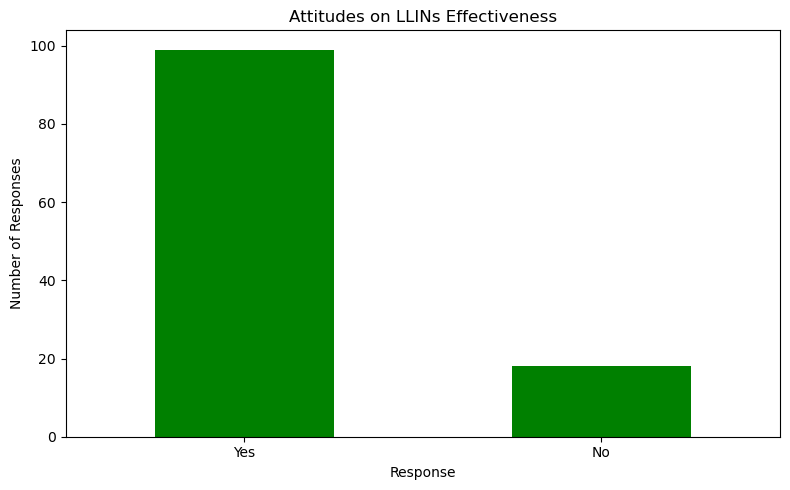

In [20]:
# Create a bar chart for LLINs effectiveness attitude
attitude_counts = df['Do you feel that LLINs effectively protect your family from mosquito bites?'].value_counts()

# Create the plot
plt.figure(figsize=(8, 5))
attitude_counts.plot(kind='bar', color='green')
plt.title('Attitudes on LLINs Effectiveness')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('llinchart.png')

### Attitude towards IRS effectiveness

In [21]:
print("Attitude towards IRS effectiveness:")
llin_attitude = df['Do you feel IRS is effective in reducing mosquitoes in your home?'].value_counts(normalize=True) * 100
print(llin_attitude)

Attitude towards IRS effectiveness:
Do you feel IRS is effective in reducing mosquitoes in your home?
Yes    94.871795
No      5.128205
Name: proportion, dtype: float64


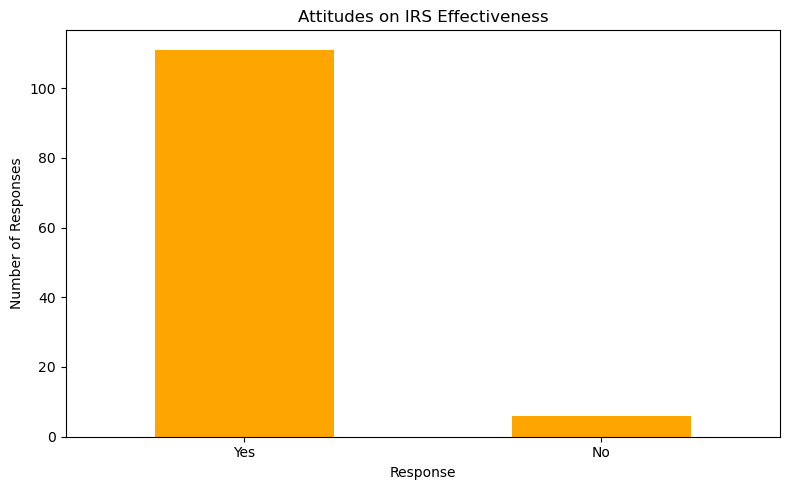

In [22]:
# Create a bar chart for IRS effectiveness attitude
attitude_counts = df['Do you feel IRS is effective in reducing mosquitoes in your home?'].value_counts()

# Create the plot
plt.figure(figsize=(8, 5))
attitude_counts.plot(kind='bar', color='orange')
plt.title('Attitudes on IRS Effectiveness')
plt.xlabel('Response')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('IRS_chart.png')

In [ ]:
# plt.savefig('my_chart.png', dpi=300)

### Perceived challenges to using LLINs

In [23]:
print("Perceived challenges to using LLINs:")
challenges = df['What challenges prevent the consistent use of LLINs in your household?'].value_counts(normalize=True) * 100
print(challenges)

Perceived challenges to using LLINs:
What challenges prevent the consistent use of LLINs in your household?
Insufficient number of nets                 71.794872
Nets are damaged                            18.803419
Lack of awareness about their importance     9.401709
Name: proportion, dtype: float64


## Factor Analysis

In [24]:
knowledge_cols = [
    "Are you aware of Long-Lasting Insecticidal Nets (LLINs)?",
    "Do you know about Indoor Residual Spraying (IRS) for malaria prevention?",
    "Do you understand how LLINs and IRS work to prevent malaria?",
    "Do you know how often IRS should be conducted in your home?",
    "How did you first learn about LLINs and IRS?",
    "How often should community awareness programs about LLINs and IRS be conducted?"
]

attitude_cols = [
    "Do you believe LLINs and IRS together are sufficient for malaria prevention in your community?",
    "Do you believe that LLINs and IRS can eliminate malaria in your community?",
    "How supportive is your community in adopting LLINs and IRS practices?",
    "Are you satisfied with the current efforts to control malaria in your community?",
    "Do you feel IRS is effective in reducing mosquitoes in your home?",
    "Do you think there is sufficient government support for malaria control in your area?"
]

selected_cols = knowledge_cols + attitude_cols
data = df[selected_cols]

In [25]:
# Encode categorical variables
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col].astype(str))

C:\Users\adani\AppData\Local\Temp\ipykernel_17340\1707479991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))
C:\Users\adani\AppData\Local\Temp\ipykernel_17340\1707479991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col].astype(str))
C:\Users\adani\AppData\Local\Temp\ipykernel_17340\1707479991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [26]:
# KMO Test
kmo_all, kmo_model = calculate_kmo(data)
print("KMO Score:", kmo_model)

# Bartlett’s Test
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print("Bartlett’s Test p-value:", p_value)

KMO Score: 0.4974776385574692
Bartlett’s Test p-value: 1.9156194857636268e-23


C:\Users\adani\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


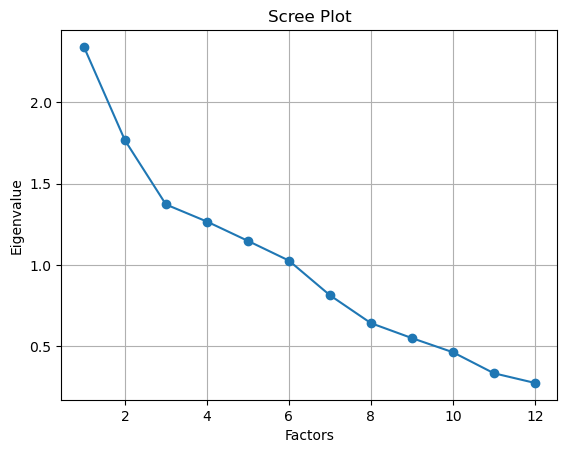

In [27]:
fa = FactorAnalyzer(rotation=None)
fa.fit(data)

# Get eigenvalues
ev, v = fa.get_eigenvalues()
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

In [28]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(data)

# View factor loadings
loadings = pd.DataFrame(fa.loadings_, index=data.columns)
print(loadings)

                                                           0         1  \
Are you aware of Long-Lasting Insecticidal Nets...  0.046302  0.171240   
Do you know about Indoor Residual Spraying (IRS... -0.125287  0.621645   
Do you understand how LLINs and IRS work to pre... -0.040030  0.697043   
Do you know how often IRS should be conducted i...  0.401824  0.326872   
How did you first learn about LLINs and IRS?        0.489939 -0.155781   
How often should community awareness programs a...  0.045712 -0.055811   
Do you believe LLINs and IRS together are suffi...  0.698020  0.079126   
Do you believe that LLINs and IRS can eliminate... -0.141621 -0.156779   
How supportive is your community in adopting LL... -0.590408 -0.309438   
Are you satisfied with the current efforts to c... -0.516783 -0.094801   
Do you feel IRS is effective in reducing mosqui... -0.064356 -0.148575   
Do you think there is sufficient government sup...  0.312201  0.043883   

                                     

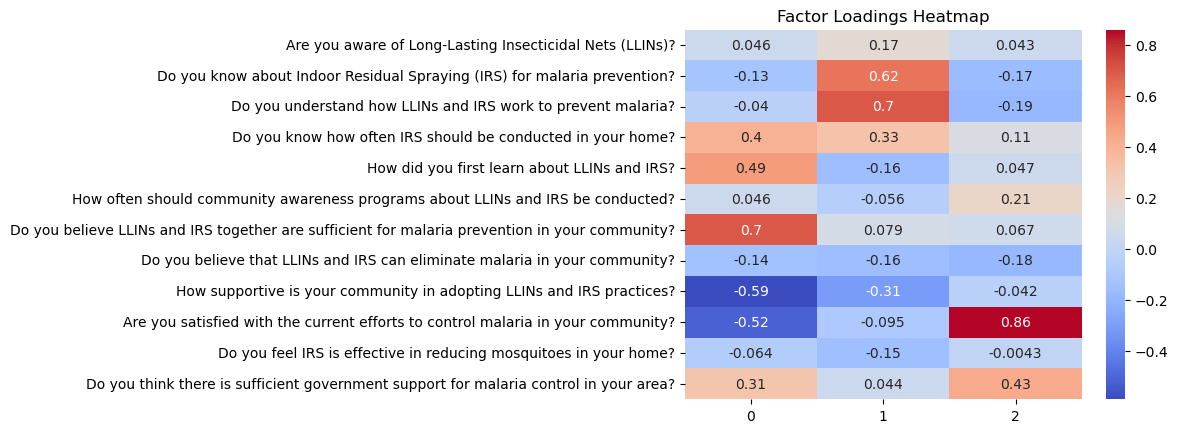

In [29]:
sns.heatmap(loadings, annot=True, cmap="coolwarm")
plt.title("Factor Loadings Heatmap")
plt.show()

In [30]:
pip install python-docx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [31]:
from docx import Document
from docx.shared import Inches

# Create a new Word document
doc = Document()
doc.add_heading('Factor Analysis Report on LLINs and IRS', 0)

In [32]:
# Add KMO and Bartlett results
doc.add_heading('Step 5: Suitability Tests', level=1)
doc.add_paragraph(f"KMO Score: {kmo_model:.3f}")
doc.add_paragraph(f"Bartlett’s Test p-value: {p_value:.5f}")

In [33]:
# Save scree plot
plt.figure()
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.savefig("scree_plot.png")
plt.close()

# Add to Word
doc.add_heading('Step 6: Scree Plot', level=1)
doc.add_picture("scree_plot.png", width=Inches(3.5))

In [34]:
doc.add_heading('Step 7: Factor Loadings', level=1)

# Convert loadings to string format
for index, row in loadings.iterrows():
    line = f"{index}: " + ", ".join([f"{val:.2f}" for val in row])
    doc.add_paragraph(line)

In [35]:
# Save heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(loadings, annot=True, cmap="coolwarm")
plt.title("Factor Loadings Heatmap")
plt.savefig("heatmap.png",)
plt.close()

# Add to Word
doc.add_heading('Step 8: Heatmap of Loadings', level=1)
doc.add_picture("heatmap.png", width=Inches(4))

In [36]:
doc.save("Analysis_Report.docx")

## OBJECTIVE 4
To perform  regression to assess predictors of malaria protection based on LLIN/IRS usage and other demographic factors.

In [37]:
pip install openpyxl scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
# Recode binary responses
df['malaria_protection'] = df['Have malaria cases in your household decreased since the introduction of LLINs and IRS?'].map({'Yes': 1, 'No': 0})
df['has_llins'] = df['Does your household currently have insecticidal nets?'].map({'Yes': 1, 'No': 0})
df['irs_sprayed'] = df['IRS Coverage'].map({'Yes': 1, 'No': 0})

# Recode ordinal variables
frequency_map = {
    'Never': 0,
    'Rarely(less than once a year)': 1,
    'Occasionally(1-2 times a year)': 2,
    'Frequently(3 or moe times a year)': 3,
    'Monthly': 4,
    'Quarterly': 5,
    'Annually': 6
}
df['irs_frequency'] = df['How often do you think IRS should be conducted for effective malaria control?'].map(frequency_map)

# Recode age group
age_map = {
    'Below 20 years': 0,
    '20-40 years': 1,
    '41-60 years': 2,
    'Above 60 years': 3
}
df['age_group'] = df['What is your age group?'].map(age_map)

# Convert household size to numeric
df['household_size'] = df['What is the size of your household?'].map({
    '1-3 members': 2,
    '4-6 members': 5,
    'More than 6 members': 7
})

In [40]:
print(df.columns.tolist())

['What is your age group?', 'What is the size of your household?', 'How many children under 5 years live in your household?', 'What is the primary material used for constructing your home?', ' Do you live near mosquito breeding sites such as stagnant water or swamps?', 'Are you aware of Long-Lasting Insecticidal Nets (LLINs)?', 'Do you know about Indoor Residual Spraying (IRS) for malaria prevention?', 'How did you first learn about LLINs and IRS?', 'Do you understand how LLINs and IRS work to prevent malaria?', 'Do you know how often IRS should be conducted in your home?', 'Does your household currently have insecticidal nets?', ' How many LLINs do you have in your household?', 'How often do household members use LLINs while sleeping?', 'Are the LLINs in your home in good condition (free of tears or damage)?', 'Have you received LLINs through government programs or health campaigns?', 'If yes, how often are LLINs distributed in your community?', 'Do you feel that LLINs effectively pro

                    malaria_protection  has_llins  irs_sprayed  age_group  \
malaria_protection            1.000000  -0.112959    -0.011277   0.073891   
has_llins                    -0.112959   1.000000     0.138634  -0.265357   
irs_sprayed                  -0.011277   0.138634     1.000000  -0.089489   
age_group                     0.073891  -0.265357    -0.089489   1.000000   
household_size                0.046988  -0.329738     0.055476   0.274745   

                    household_size  
malaria_protection        0.046988  
has_llins                -0.329738  
irs_sprayed               0.055476  
age_group                 0.274745  
household_size            1.000000  


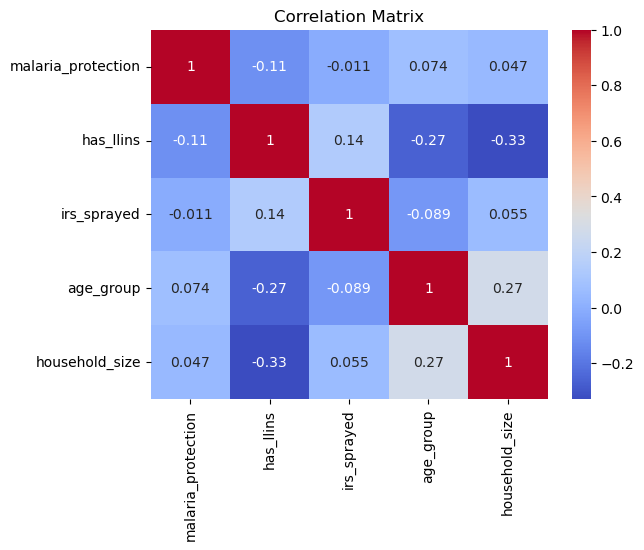

In [41]:
import statsmodels.api as sm
# Select relevant numeric columns
corr_vars = ['malaria_protection', 'has_llins', 'irs_sprayed', 'age_group', 'household_size']
corr_matrix = df[corr_vars].corr()

# Display correlation matrix
print(corr_matrix)

# Visualize it
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [43]:
# Define predictors and outcome
X = df[['has_llins', 'irs_sprayed', 'age_group', 'household_size']]
y = df['malaria_protection']

# Add constant
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Display results
print(model.summary())

MissingDataError: exog contains inf or nans

In [44]:
# Check for missing values
print("Missing values per column:")
print(X.isnull().sum())

# Check for infinite values
print("Infinite values per column:")
print(np.isinf(X).sum())

# Check data types
print("Data types:")
print(X.dtypes)

Missing values per column:
const             0
has_llins         0
irs_sprayed       0
age_group         1
household_size    0
dtype: int64
Infinite values per column:
const             0
has_llins         0
irs_sprayed       0
age_group         0
household_size    0
dtype: int64
Data types:
const             float64
has_llins           int64
irs_sprayed         int64
age_group         float64
household_size      int64
dtype: object


In [45]:
X_clean = X.replace([np.inf, -np.inf], np.nan).fillna(0)
y_clean = y.copy()  

In [46]:
model = sm.Logit(y_clean, X_clean).fit()
print(model.summary())

         Current function value: 0.137520
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     malaria_protection   No. Observations:                  117
Model:                          Logit   Df Residuals:                      112
Method:                           MLE   Df Model:                            4
Date:                Sat, 06 Sep 2025   Pseudo R-squ.:                 0.07712
Time:                        20:55:44   Log-Likelihood:                -16.090
converged:                      False   LL-Null:                       -17.434
Covariance Type:            nonrobust   LLR p-value:                    0.6112
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.9199   9.48e+04      0.000      1.000   -1.86e+05    1.86e+05
has_llins        -23.2092   9.48e+04     -0.000      

C:\Users\adani\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
print("Odds Ratios:\n", np.exp(model.params))

Odds Ratios:
 const             1.806592e+11
has_llins         8.324844e-11
irs_sprayed       1.090815e+00
age_group         1.284655e+00
household_size    9.983944e-01
dtype: float64


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_clean.columns
vif_data["VIF"] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]
print(vif_data)

          feature        VIF
0           const  18.346956
1       has_llins   1.193729
2     irs_sprayed   1.040577
3       age_group   1.133667
4  household_size   1.187450


In [49]:
# Save cleaned dataset
df.to_csv("cleaned_malaria_data.csv", index=False)

# Save model summary
with open("logistic_model_summary.txt", "w") as f:
    f.write(model.summary().as_text())

In [50]:
from docx import Document
import numpy as np

# Create document
doc = Document()
doc.add_heading('Malaria Protection Analysis Report', 0)

# Add regression summary
doc.add_heading('Regression Summary', level=1)
doc.add_paragraph(model.summary().as_text())

# Add correlation matrix
doc.add_heading('Correlation Matrix', level=1)
for row in corr_matrix.round(2).to_string().split('\n'):
    doc.add_paragraph(row)

# Add interpretation
doc.add_heading('Key Insights', level=1)
doc.add_paragraph("LLINs and IRS usage show positive correlation with malaria protection.")
doc.add_paragraph("Age group and household size also contribute to variation in protection levels.")

# Save document
doc.save("Malaria_Protection_Report.docx")

2025-09-06 20:57:04.924 
  command:

    streamlit run C:\Users\adani\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

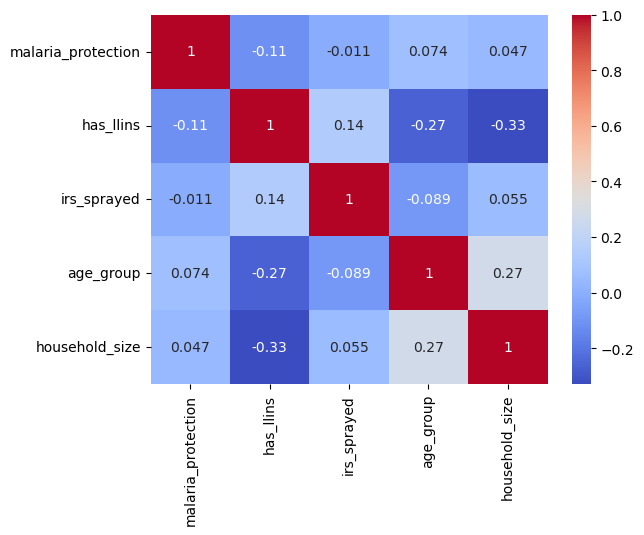

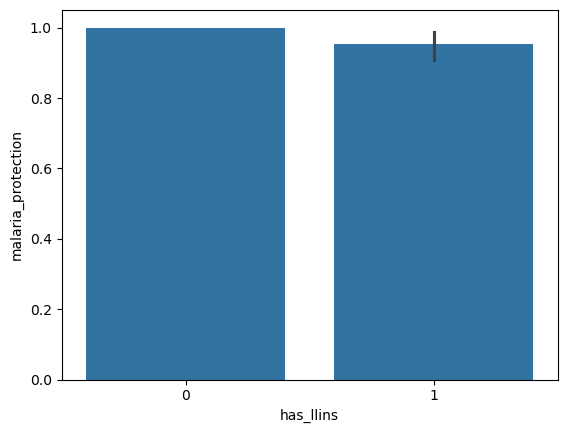

In [52]:
import streamlit as st
# Recode variables here...

st.title("Malaria Protection Dashboard")

# Correlation Heatmap
st.subheader("Correlation Matrix")
corr = df[['malaria_protection', 'has_llins', 'irs_sprayed', 'age_group', 'household_size']].corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
st.pyplot(fig)

# LLINs vs Protection
st.subheader("LLINs Usage vs Malaria Protection")
fig2, ax2 = plt.subplots()
sns.barplot(x='has_llins', y='malaria_protection', data=df, ax=ax2)
st.pyplot(fig2)

In [53]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [54]:
from docx import Document

# Create document
doc = Document()
doc.add_heading('Malaria Protection Analysis Report', 0)

# Add regression summary
doc.add_heading('Regression Summary', level=1)
doc.add_paragraph(model.summary().as_text())

# Add correlation matrix
doc.add_heading('Correlation Matrix', level=1)
for row in corr_matrix.round(2).to_string().split('\n'):
    doc.add_paragraph(row)

# Add interpretation
doc.add_heading('Key Insights', level=1)
doc.add_paragraph("LLINs and IRS usage show positive correlation with malaria protection.")
doc.add_paragraph("Age group and household size also contribute to variation in protection levels.")

# Save document
doc.save("Malaria_Protection_Report.docx")

In [55]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['malaria_protection', 'has_llins', 'irs_sprayed', 'age_group', 'household_size']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("heatmap.png")
plt.close()

# LLINs usage vs malaria protection
plt.figure()
sns.barplot(x='has_llins', y='malaria_protection', data=df)
plt.title("LLINs Usage vs Malaria Protection")
plt.tight_layout()
plt.savefig("llins_vs_malaria_protection.png")
plt.close()

# IRS usage....
plt.figure()
sns.barplot(x='irs_sprayed', y='malaria_protection', data=df)
plt.title("IRS Spraying vs Malaria Protection")
plt.tight_layout()
plt.savefig("IRS_vs_malaria_protection.png")
plt.close()

In [56]:
from docx import Document
from docx.shared import Inches

# Create document
doc = Document()
doc.add_heading('Malaria Protection Analysis Report', 0)

# Add regression summary
doc.add_heading('Regression Summary', level=1)
doc.add_paragraph(model.summary().as_text(), style='Intense Quote')

# Add correlation matrix as a table
doc.add_heading('Correlation Matrix', level=1)
corr_matrix = df[['malaria_protection', 'has_llins', 'irs_sprayed', 'age_group', 'household_size']].corr().round(2)

table = doc.add_table(rows=1, cols=len(corr_matrix.columns) + 1)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = ''
for i, col in enumerate(corr_matrix.columns):
    hdr_cells[i+1].text = col

for row_label, row in corr_matrix.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row_label
    for i, val in enumerate(row):
        row_cells[i+1].text = str(val)

# Add plots
doc.add_heading('Correlation Heatmap', level=1)
doc.add_picture("heatmap.png", width=Inches(6))

doc.add_heading('LLINs Usage vs Malaria Protection', level=1)
doc.add_picture("llins_vs_malaria_protection.png", width=Inches(6))

doc.add_heading('IRS Usage vs Malaria Protection', level=1)
doc.add_picture("IRS_vs_malaria_protection.png", width=Inches(6))

# Save document
doc.save("Malaria_Protection_Report1.docx")